In [1]:
from pyathena import connect
import pandas as pd
import os
import re 

#Assume role before!
conn = connect(aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
              aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
              aws_session_token=os.getenv('AWS_SESSION_TOKEN'),
              s3_staging_dir='s3://aws-athena-query-results-878189897945-eu-west-1/',
              region_name='eu-west-1')

query = "SELECT * FROM alpha_health_evermind.events"
df = pd.read_sql(query, conn)
df

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,createdat,deploymentenv,device,event,product,schema,source,type,unique_name,user,...,view,data,element,error,level,message,stacktrace,year,month,day
0,2020-01-17T16:40:26.301592-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",tap,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,tap.login.back,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,login,None,back,None,None,None,None,2020,01,20
1,2020-01-17T16:40:26.304645-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.splash.null,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,splash,None,None,None,None,None,None,2020,01,20
2,2020-01-17T16:40:26.316136-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.splash.null,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,splash,"{view=splash, question=null, answers=null, sco...",None,None,None,None,None,2020,01,20
3,2020-01-17T16:40:27.549263-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",tap,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,tap.splash.sign-up,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,splash,None,sign-up,None,None,None,None,2020,01,20
4,2020-01-17T16:40:27.550201-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.sign-up.null,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,sign-up,None,None,None,None,None,None,2020,01,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83349,2019-11-26T12:00:09.483744+00:00,prod,"{id=2777CD3D-7AA8-4461-BB54-DC7338E51EC1, mode...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.activity.null,{id=c7d94497-16a6-4983-bbd8-d49e5939c3b4},...,activity,None,None,None,None,None,None,2019,11,26
83350,2019-11-26T12:00:09.483744+00:00,prod,"{id=2777CD3D-7AA8-4461-BB54-DC7338E51EC1, mode...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.activity.null,{id=c7d94497-16a6-4983-bbd8-d49e5939c3b4},...,activity,None,None,None,None,None,None,2019,11,26
83351,2019-11-26T14:43:13.389037+00:00,prod,"{id=a9a1e3f5498c6aac, model=SM-G950F, platform...",app_resume,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_resume.assessment.null,{id=6a252400-4aaf-46ab-aeb7-6788d4bb140f},...,assessment,None,None,None,None,None,None,2019,11,26
83352,2019-11-26T14:48:27.728179+00:00,prod,"{id=a9a1e3f5498c6aac, model=SM-G950F, platform...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.assessment.null,{id=6a252400-4aaf-46ab-aeb7-6788d4bb140f},...,assessment,None,None,None,None,None,None,2019,11,26


In [2]:
df[df['event']=='media_finish']['data'].iloc[6]

'{view=null, question=null, answers=null, score=null, programme-id=null, programme-title=null, activity-id=250d838a-54c3-4aae-bf6f-5a6057890aa1, activity-title=Deep belly breathing, slide=null, page=null, input-id=null, feedback=null, audio-id=dd5ad6a0-6abd-4f1b-82c2-ff968390c34d, duration=0:06:22.142000, position=0:06:22.142000, level=null, module-id=null, module-title=null, action=null, labels=null, labels-selected=null, records-done=null, questionsanswered=null, notification=null, date=null, programme-state=null, step=null, suggested=null, programme-step=null, answer-id=null, aswer-value=null, answer-ids=null, answer-values=null, example=null, numofdaysago=null, iscompleted=null, group=null}'

In [3]:
df["event"].unique()

array(['tap', 'screen_view', 'app_pause', 'app_open', None, 'app_resume',
       'impression', 'assessment', 'media_play', 'media_pause',
       'media_finish', 'activity_results', 'select_date',
       'app_resume_from_notification', 'app_open_from_notification',
       'media_restart'], dtype=object)

In [4]:
def getKey(k, raw):
    """
    Function used to return the content for different keys in the data array. 
    This function will be used to create new columns for scores etc.
    """
    if isinstance(raw, float):
        return(float('NaN'))
    
    raw.replace('null', 'NaN')
    
    if k == 'score':
        num = re.search('{}=(\d+)'.format(k), raw)
        if num:
          num = int(num.group(1))
        return(num)

    if k == 'answers': 
        ary = re.search(r"\[(.*)\]".format(k), raw)
        print(ary)
        if ary:
            ary = ary.group()
            ary = re.sub('\D', ' ', ary)
            ary = ary.split()
            if ary:
                return(ary)
    
    # if string
    sub_string = re.search('{}=(.+?),'.format(k), raw)
    if sub_string:
      string = sub_string.group(1)
      if sub_string:
        return(string)


In [5]:
"""new_dict = {}
new_dict['score'] = getKey('score', test)
new_dict['question'] = getKey('question', test)
new_dict['answers'] = getKey('answers', test)
new_dict['activity-title'] = getKey('activity-title', test)
new_dict['page'] = getKey('page', test)
new_dict['activity-id'] = getKey('activity-id', test)

print(new_dict)"""

"new_dict = {}\nnew_dict['score'] = getKey('score', test)\nnew_dict['question'] = getKey('question', test)\nnew_dict['answers'] = getKey('answers', test)\nnew_dict['activity-title'] = getKey('activity-title', test)\nnew_dict['page'] = getKey('page', test)\nnew_dict['activity-id'] = getKey('activity-id', test)\n\nprint(new_dict)"

## Getting the values out of the data dictionary

In [6]:
df2 = df.copy()
df2.fillna(value = pd.np.nan, inplace=True)

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [7]:
general = df2['data']
media = df[df['event']=='media_finish']['data']

df2['score'] = general.apply(lambda x: getKey('score', x))
df2['answers'] = general.apply(lambda x: getKey('answers', x))
df2['page'] = general.apply(lambda x: getKey('page', x))
df2['activity-title'] = general.apply(lambda x: getKey('activity-title', x))
df2['media_finish'] = media.apply(lambda x: getKey('position', x))
df2['labels'] = general.apply(lambda x: getKey('labels', x))
df2.head()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[2, 1, 2, 3, 3, 2, 2, 2, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[2, 2, 2, 1, 2, 3, 3, 2, 1, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[2, 2, 3, 1, 2, 2, 1, 1, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Non

None
None
<_sre.SRE_Match object; span=(356, 395), match='[Interpersonal relationships, Workload]'>
None
None
<_sre.SRE_Match object; span=(356, 404), match='[Work life balance, Interpersonal relationships]'>
None
None
<_sre.SRE_Match object; span=(356, 406), match='[Work life balance, Workload, Performance at work>
None
None
<_sre.SRE_Match object; span=(356, 387), match='[Workload, Performance at work]'>
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[3, 2, 1, 2, 3, 3, 2, 2, 3, 3]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[3, 2, 2, 1, 2, 2, 2, 2, 3, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 385), match='[Interpersonal relationships]'>
None
None
<_sre.SRE_Match object; span=(356, 385), match='[Interpersonal relationships]'>
None
None
<_sre.SRE_Match object; span=(356, 385), match='[Interpersonal relationships]'>
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 385), match='[Interpersonal relationships]'>
None
None
<_sre.SRE_Match object; span=(356, 385), match='[Interpersonal relationships]'>
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 385), match='[Interpersonal relationships]'>
None
None
<_sre.SRE_Match object; span=(356, 385), matc

None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 389), match='[Always looking on the down side]'>
None
None
<_sre.SRE_Match object; span=(356, 389), match='[Always looking on the down side]'>
None
None
<_sre.SRE_Match object; span=(356, 375), match='[Fearing the worst]'>
None
None
<_sre.SRE_Match object; span=(356, 370), match='[Mind reading]'>
None
None
<_sre.SRE_Match object; span=(356, 375), match='[Fearing the worst]'>
None
None
None
None
<_sre.SRE_Match object; span=(356, 389), match='[Mind reading, Fearing the worst]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 382), match='[Black and white thinking]'>
None
None
<_sre.SRE_Match 

None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[1, 2, 3, 2, 3, 2, 2, 2, 3, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[0, 2, 2, 2, 2, 2, 2, 2, 3, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(572, 634), match='[0, 0, 1, 0, 0], answer-values=[true, true, true,>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 424), match='[Fearing the worst, Always looking on the down si>
None
None
<_sre.SRE_Match object; span=(356, 405), match='[Mind reading, Fearing the worst, Generalisation]>
None
None
<_sre.SRE_Match object; span=(356, 396), match='[Black and white thinking, Mind reading]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 366), match='[Workload]'>
None
None
<_sre.SRE_Match object; span=(356, 377), match='[Performance at work]'>
None
None
<_sre.SRE_Match object; span=(356, 366), match='[Workload]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

None
<_sre.SRE_Match object; span=(356, 386), match='[Health, Concern about family]'>
None
None
<_sre.SRE_Match object; span=(356, 404), match='[Concern about family, Other, Financial, Health]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[2, 3, 2, 2, 3, 3, 2, 3, 3, 3]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(572, 633), match='[0, 0, 1, 1, 0], answer-values=[true, true, true,>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 37

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 423), match='[Financial, Performance at work, The world we liv>
None
None
<_sre.SRE_Match object; span=(356, 410), match='[Financial, Performance at work, The world we liv>
None
None
<_sre.SRE_Match object; span=(356, 439), match='[Work life balance, Performance at work, Workload>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Mat

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(572, 634), match='[0, 0, 0, 1, 0], answer-values=[true, true, false>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(356, 420), match='[Interpersonal relationships, Self-esteem, Concer>
None
None
<_sre.SRE_Match object; span=(356, 401), match='[Self-est

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[1, 1, 2, 2, 2, 2, 2, 2, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[3, 4, 4, 1, 3, 4, 3, 3, 3, 3]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[2, 3, 3, 1, 2, 3, 2, 2, 0, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[2, 1, 2, 1, 2, 2, 2, 2, 2, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(35, 65), match='[1, 3, 4, 3, 2, 3, 3, 4, 3, 3]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

,createdat,deploymentenv,device,event,product,schema,source,type,unique_name,user,...,stacktrace,year,month,day,score,answers,page,activity-title,media_finish,labels
0,2020-01-17T16:40:26.301592-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",tap,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,tap.login.back,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,NaN,2020,01,20,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-17T16:40:26.304645-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.splash.null,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,NaN,2020,01,20,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-17T16:40:26.316136-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.splash.null,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,NaN,2020,01,20,NaN,null,null,null,NaN,null
3,2020-01-17T16:40:27.549263-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",tap,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,tap.splash.sign-up,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,NaN,2020,01,20,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-17T16:40:27.550201-05:00,prod,"{id=812c2e41c64d3b51, model=SM-G960U, platform...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.sign-up.null,{id=46dc9b12-42c4-4ba7-8c1c-9d1404e0903a},...,NaN,2020,01,20,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2 = df2.replace('null', pd.np.nan)
df2.tail()

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,createdat,deploymentenv,device,event,product,schema,source,type,unique_name,user,...,stacktrace,year,month,day,score,answers,page,activity-title,media_finish,labels
83349,2019-11-26T12:00:09.483744+00:00,prod,"{id=2777CD3D-7AA8-4461-BB54-DC7338E51EC1, mode...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.activity.null,{id=c7d94497-16a6-4983-bbd8-d49e5939c3b4},...,NaN,2019,11,26,NaN,NaN,NaN,NaN,NaN,NaN
83350,2019-11-26T12:00:09.483744+00:00,prod,"{id=2777CD3D-7AA8-4461-BB54-DC7338E51EC1, mode...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.activity.null,{id=c7d94497-16a6-4983-bbd8-d49e5939c3b4},...,NaN,2019,11,26,NaN,NaN,NaN,NaN,NaN,NaN
83351,2019-11-26T14:43:13.389037+00:00,prod,"{id=a9a1e3f5498c6aac, model=SM-G950F, platform...",app_resume,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_resume.assessment.null,{id=6a252400-4aaf-46ab-aeb7-6788d4bb140f},...,NaN,2019,11,26,NaN,NaN,NaN,NaN,NaN,NaN
83352,2019-11-26T14:48:27.728179+00:00,prod,"{id=a9a1e3f5498c6aac, model=SM-G950F, platform...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.assessment.null,{id=6a252400-4aaf-46ab-aeb7-6788d4bb140f},...,NaN,2019,11,26,NaN,NaN,NaN,NaN,NaN,NaN
83353,2019-11-26T14:17:35.587577+00:00,prod,"{id=a9a1e3f5498c6aac, model=SM-G950F, platform...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.assessment.null,{id=6a252400-4aaf-46ab-aeb7-6788d4bb140f},...,NaN,2019,11,26,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def outputPerUser(df, cat):
    df.dropna(subset = [cat], inplace=True)
    
    df.sort_values(["userid", cat])
    valid_ids = df['userid'].unique()
    new = df[(df['userid'].isin(valid_ids))]
    new = new.groupby('userid')
    new = new[cat].agg(list)
    new = new.to_frame()[cat]
    newdf = new.to_frame()   
    return newdf

In [10]:
df3 = df2.copy()
scoresdf = outputPerUser(df3, 'score')

In [11]:
scoresdf

,score
userid,
00da7219-c1bd-4b67-acc5-fa6da0668d05,"[23.0, 0.0, 20.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0..."
01021dae-990a-4713-b087-a4208dde3f3d,[17.0]
02de1825-88b8-4bd7-a473-49620e9a7e60,[12.0]
044a1e47-e2aa-4d90-8ad3-00c63096d085,[13.0]
04f287a8-c498-4655-896b-0231185e16a8,"[26.0, 24.0]"
...,...
fc9c6a6e-d60a-4d5c-a6bf-0fc9f644b91b,"[0.0, 0.0, 21.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0..."
fd0bc52e-d1a4-405a-bd01-300a3d430209,"[0.0, 0.0, 0.0, 0.0, 0.0, 16.0]"
fd6b7f72-4220-4e08-a230-94c6cbe2fe0d,[40.0]


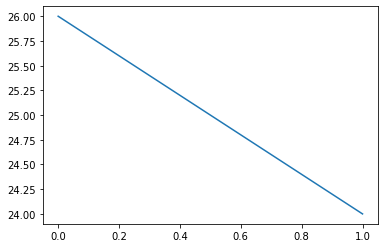

In [12]:
import matplotlib.pyplot as plt
plt.plot(scoresdf['score'][4])

## Calculate total time of listening to media

In [13]:
df3 = df2.copy()
df3['media_finish'] = pd.to_timedelta(df3.media_finish)

In [14]:
df3.dropna(subset = ["media_finish"], inplace=True)

In [15]:
timesdf = outputPerUser(df3, 'media_finish')

In [16]:
def calculateTotalDuration(x):
    total = sum(pd.to_timedelta(x), datetime.timedelta(0,0))
    return total 

In [17]:
import datetime
test = timesdf['media_finish']
timesdf['total'] = test.apply(lambda x: calculateTotalDuration(x))

In [18]:
timesdf.sort_values("total", ascending = False)

,media_finish,total
userid,,
dc9578be-0093-4526-8495-ea3550933fb1,"[0 days 00:04:08.451000, 0 days 00:30:00.02200...",2 days 12:39:51.288000
b9226e9d-f839-46e9-8e2b-e27fa42736aa,"[0 days 00:06:21.980000, 0 days 00:10:11.15200...",1 days 22:59:19.968000
41e1dcca-20c7-4027-b36b-4386740a535b,"[0 days 00:29:59.964000, 0 days 00:29:59.87300...",1 days 00:08:55.598000
6dce0158-0d78-43a3-afdf-c6a5801859c7,"[0 days 00:09:03.326000, 0 days 00:29:59.88700...",0 days 14:00:03.580000
3016f096-50d6-4613-ac4e-ebd984abcdaf,"[0 days 00:10:11, 0 days 00:10:11, 0 days 00:0...",0 days 04:06:31
42735b08-ef07-42c6-aa3c-34044f8635ac,"[0 days 00:30:00, 0 days 00:30:00, 0 days 00:0...",0 days 03:44:27
36980a9e-ddfe-4bd4-953d-9de4d700a824,"[0 days 00:10:11.222000, 0 days 00:10:11.26500...",0 days 03:21:43.391000
30e9490b-003b-4c94-9473-1b6229e238c5,"[0 days 00:09:19.013000, 0 days 00:30:00.02200...",0 days 03:09:18.665000
,"[0 days 00:11:38.110000, 0 days 00:30:00.02200...",0 days 02:23:16.308000


## Popular tracks and duration per user

In [19]:
df3 = df2.copy()
df3['media_finish'] = pd.to_timedelta(df3.media_finish)

In [20]:
df3.dropna(subset = ['media_finish'], inplace=True)
df3.sort_values(["userid", 'media_finish'])
valid_ids = df3['userid'].unique()
pop = df3[(df3['userid'].isin(valid_ids))]
pop = pop.groupby(['userid', 'activity-title'])
pop = pop['media_finish'].agg(list)
pop = pop.to_frame()['media_finish']
popdf = pop.to_frame()  

In [21]:
import datetime
test = df3['media_finish']
popdf['total'] = test.apply(lambda x: calculateTotalDuration(x))

TypeError: 'Timedelta' object is not iterable

In [ ]:
popdf.sort_values("total", ascending = False)

## Labels per user

In [ ]:
labels = df2.copy()
labels['labels'].unique()

In [ ]:
labels = outputPerUser(labels, 'labels')

In [ ]:
labels.sort_values("labels").iloc[3][0]

## Popular weekdays per user

In [ ]:
time = df2.copy()
time['createdat']=pd.to_datetime(time['createdat'], utc=True)

In [ ]:
time['createdat'].iloc[1].weekday()

In [ ]:
def weekdays(x):
    w = x.weekday()  
    return w

In [ ]:
test = time[time['event'] == 'app_open']['createdat']

In [ ]:
time['weekday'] = test.apply(lambda x: weekdays(x))

In [ ]:
x = outputPerUser(time, 'weekday')
x

In [ ]:
plt.hist(x['weekday'][0], bins = 7)
plt.show()

In [ ]:
df2